In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import seaborn as sns
from scipy.sparse import csr_matrix

In [8]:
df = pd.read_csv("Datasets/IMDB Dataset.csv")

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.shape

(50000, 2)

In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [14]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [15]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

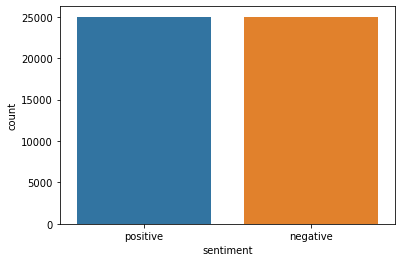

In [16]:
sns.countplot(df['sentiment'])

In [17]:
#positive = 1 and negative =0

label = LabelEncoder()
df['sentiment'] = label.fit_transform(df['sentiment'])

In [18]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [19]:
X = df['review']
y = df['sentiment']

In [20]:
stop = stopwords.words("english")
import string
punctuations = list(string.punctuation)
stop += punctuations
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
from nltk.corpus import wordnet
from nltk import pos_tag

In [23]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('A'):
        return wordnet.ADV
    else:
        return wordnet.NOUN        

In [24]:
def clean_review(review):
    review_list = re.sub("[^a-zA-Z]"," ", review).lower().split()
    clean_list=[]
    for word in review_list:
        if word not in stop:
            pos = pos_tag([word])[0][1]
            w = lemmatizer.lemmatize(word,pos = get_simple_pos(pos))
            clean_list.append(w.lower())  
    return " ".join(clean_list)

In [25]:
print(clean_review(X[0]))
print(clean_review(X[1]))

one reviewer mention watch oz episode hooked right exactly happen br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustom high level graphic violence violence injustice crooked guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may b

In [27]:
cleaned_X = []
i=0
for review in X:
    cleaned_X.append(clean_review(review))
    if i%1000==0:
        print("done:- ",i)
    i+=1
    

done:-  0
done:-  1000
done:-  2000
done:-  3000
done:-  4000
done:-  5000
done:-  6000
done:-  7000
done:-  8000
done:-  9000
done:-  10000
done:-  11000
done:-  12000
done:-  13000
done:-  14000
done:-  15000
done:-  16000
done:-  17000
done:-  18000
done:-  19000
done:-  20000
done:-  21000
done:-  22000
done:-  23000
done:-  24000
done:-  25000
done:-  26000
done:-  27000
done:-  28000
done:-  29000
done:-  30000
done:-  31000
done:-  32000
done:-  33000
done:-  34000
done:-  35000
done:-  36000
done:-  37000
done:-  38000
done:-  39000
done:-  40000
done:-  41000
done:-  42000
done:-  43000
done:-  44000
done:-  45000
done:-  46000
done:-  47000
done:-  48000
done:-  49000


In [28]:
print(len(cleaned_X))

50000


In [29]:
cleaned_X

['one reviewer mention watch oz episode hooked right exactly happen br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watch developed taste oz get accustom high level graphic violence violence injustice crooked guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000, )
X_cleaned = csr_matrix(cv.fit_transform(cleaned_X)).toarray()

In [31]:
X_cleaned.shape

(50000, 5000)

In [33]:
X_train , X_test , Y_train , Y_test = train_test_split(X_cleaned , y , test_size=0.2 , random_state=11)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

In [34]:
mnb = MultinomialNB()
mnb.fit(X_train , Y_train)

MultinomialNB()

In [35]:
pred = mnb.predict(X_test)

In [36]:
print(accuracy_score(Y_test , pred))
print(confusion_matrix(Y_test , pred))
print(classification_report(Y_test , pred))

0.8563
[[4238  716]
 [ 721 4325]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4954
           1       0.86      0.86      0.86      5046

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [37]:
pd.DataFrame(np.c_[Y_test , pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
9995,1,1
9996,1,1
9997,0,1
9998,0,0


In [50]:
pickle.dump(cv , open("Models/count-Vectorizer.pkl" , "wb"))
pickle.dump(mnb , open("Models/Movies_Review_Classification.pkl" , "wb"))  # 1: pos , 0:Neg

In [3]:
import pickle

In [4]:
save_cv = pickle.load(open('Models/count-Vectorizer.pkl','rb'))
model = pickle.load(open('Models/Movies_Review_Classification.pkl','rb'))

In [5]:
def test_model(sentence):
    sen = csr_matrix(save_cv.transform([sentence])).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [6]:
sen = input("Enter the Review: ")
res = test_model(sen)
print(res)

Enter the Review: the movie was good but i did not like it


NameError: name 'csr_matrix' is not defined